# Analisis Produk Terlaris dari Data Perilaku Customer Toko Online

# Overview

Salah satu informasi yang bisa didapat dari data penjualan toko online adalah data perilaku customer. Project machine learning ini bertujuan untuk memprediksi apakah seorang customer toko online akan membeli suatu barang atau tidak menggunakan data perilaku customer dari toko online tersebut. Selain machine learning, akan dianalisis juga informasi penting lain, misalnya seperti apa produk yang laris dijual berdasarkan perilaku pembelinya di toko online. Hasil analisis project machine learning ini diharapkan nantinya bisa membantu penjual di toko online, distributor barang, atau pihak-pihak berkepentingan lain untuk mengambil keputusan tentang penjualan suatu barang berdasarkan data perilaku customer barang tersebut.

# Dataset

Data yang digunakan dalam project ini adalah data perilaku customer selama 5 bulan dari bulan oktober 2019 sampai bulan februari 2020 yang dikumpulkan oleh [Open CDP](https://rees46.com/en/open-cdp) dari salah toko elektronik online. Data ini bisa di download dari website kaggle di [link berikut](https://www.kaggle.com/datasets/mkechinov/ecommerce-events-history-in-electronics-store?resource=download). Ada 885129 baris dan 9 kolom dengan deskripsi tiap kolom-kolom yang ada dalam data adalah sebagai berikut:
1. event_time: waktu tiap terjadinya event/perilaku dalam UTC.
2. event_type: perilaku yang dilakukan, ada 3 jenis yaitu view, cart, dan purchase.
3. product_id: ID dari produk.
4. category_id: ID untuk kategori produk.
5. category_code: Kategori produk.
6. brand: nama brand produk.
7. price: harga produk.
8. user_id: ID permanen pengguna.
9. user_session: ID pengguna tiap yang berubah tiap sesi.

# Exploratory Data Analysis

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# membaca data yang akan dianalisis
data=pd.read_csv('events.csv')
data.head(3)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy


In [3]:
# melihat apakah ada duplicated data
data.duplicated().sum()

655

In [4]:
# menghapus duplicated data
data.drop_duplicates(inplace=True)

In [5]:
# mengatur urutan data agar lebih rapi
data=data[['user_id','user_session','product_id','category_code','price','brand','event_type','event_time']]
data.head(3)

,user_id,user_session,product_id,category_code,price,brand,event_type,event_time
0,1515915625519388267,LJuJVLEjPT,1996170,electronics.telephone,31.90,NaN,view,2020-09-24 11:57:06 UTC
1,1515915625519380411,tdicluNnRY,139905,computers.components.cooler,17.16,zalman,view,2020-09-24 11:57:26 UTC
2,1515915625513238515,4TMArHtXQy,215454,NaN,9.81,NaN,view,2020-09-24 11:57:27 UTC


In [6]:
# melihat missing value
data.isna().sum()

user_id               0
user_session        162
product_id            0
category_code    236047
price                 0
brand            212232
event_type            0
event_time            0
dtype: int64

In [7]:
# mengisi missing value kolom brand
data['brand'].fillna('No Brand',inplace=True)

In [8]:
# mengisi missing value kolom category_code
data['category_code']=data['category_code'].fillna('No_Category.No_Category.No_Category')

In [9]:
# mengisi missing value kolom user_session
data['user_session'].fillna('No_User_Session',inplace=True)

## Analisis kolom <mark>category_code</mark> level dasar

In [10]:
# persiapkan data_category1 yang akan di analisis
data_category1=data.copy()
data_category1=data_category1[data_category1['event_type']=='purchase'].reset_index(drop=True)
data_category1.head(3)

,user_id,user_session,product_id,category_code,price,brand,event_type,event_time
0,1515915625519390468,xn6SHCnZtk,1507291,computers.components.power_supply,217.57,supermicro,purchase,2020-09-24 12:04:10 UTC
1,1515915625513574486,2gngxS29Ts,822426,computers.peripherals.camera,123.35,logitech,purchase,2020-09-24 12:15:06 UTC
2,1515915625518130982,3yFCkx2KKW,4060928,electronics.video.tv,89.22,No Brand,purchase,2020-09-24 12:19:01 UTC


In [11]:
# melihat apakah ada data kolom event_time yang missing value
data_category1['category_code'].isnull().sum()

0

In [12]:
# membuat kolom category pertama
data_category1["category_code_level1"] = data_category1["category_code"].str.split(".",expand=True)[0].astype('category')
data_category1.head(3)

,user_id,user_session,product_id,category_code,price,brand,event_type,event_time,category_code_level1
0,1515915625519390468,xn6SHCnZtk,1507291,computers.components.power_supply,217.57,supermicro,purchase,2020-09-24 12:04:10 UTC,computers
1,1515915625513574486,2gngxS29Ts,822426,computers.peripherals.camera,123.35,logitech,purchase,2020-09-24 12:15:06 UTC,computers
2,1515915625518130982,3yFCkx2KKW,4060928,electronics.video.tv,89.22,No Brand,purchase,2020-09-24 12:19:01 UTC,electronics


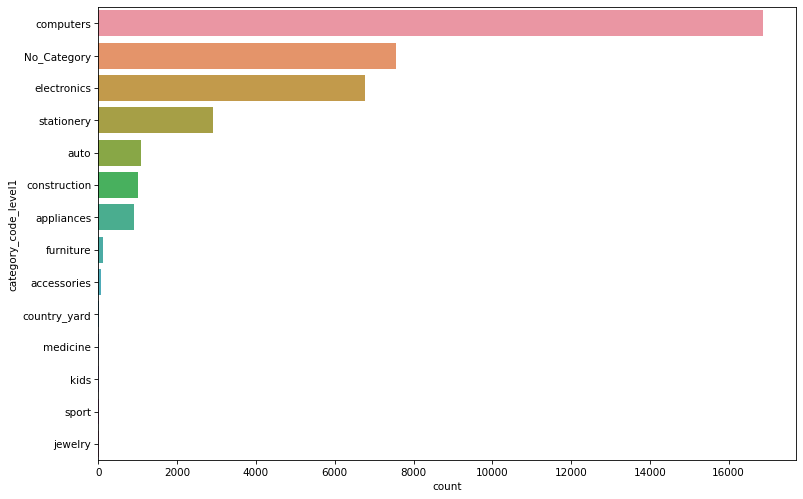

In [13]:
# membuat diagram kategori produk paling laris
plt.figure(figsize=(12,8),dpi=75)
ax = sns.countplot(data=data_category1,y='category_code_level1',order=data_category1.category_code_level1.value_counts().index)
plt.show()

__Observasi:__ Jenis barang yang paling banyak terjual adalah barang yang berhubungan dengan komputer, barang yang paling sedikit terjual adalah barang berkategori jewelry, dan kategori lainnya berada diantara kategori komputer dan jewelry, sesuai dengan diagram diatas.

## Analisis kolom <mark>category_code</mark> lengkap

Analisis kolom kategori kode yang lebih lengkap yang termasuk jenis produknya, mengambil 10 jenis produk yang paling banyak dibeli.

In [14]:
# persiapkan data_category yang akan di analisis
data_category=data.copy()
data_category=data_category[data_category['event_type']=='purchase'].reset_index(drop=True)
data_category.head(3)

,user_id,user_session,product_id,category_code,price,brand,event_type,event_time
0,1515915625519390468,xn6SHCnZtk,1507291,computers.components.power_supply,217.57,supermicro,purchase,2020-09-24 12:04:10 UTC
1,1515915625513574486,2gngxS29Ts,822426,computers.peripherals.camera,123.35,logitech,purchase,2020-09-24 12:15:06 UTC
2,1515915625518130982,3yFCkx2KKW,4060928,electronics.video.tv,89.22,No Brand,purchase,2020-09-24 12:19:01 UTC


In [15]:
# melihat apakah ada data kolom event_time yang missing value
data_category['category_code'].isnull().sum()

0

In [16]:
# mengisi nilai kosong dalam kolom data_category1
data_category['category_code']=data_category['category_code'].fillna('No_Category')
data_category.head(3)

,user_id,user_session,product_id,category_code,price,brand,event_type,event_time
0,1515915625519390468,xn6SHCnZtk,1507291,computers.components.power_supply,217.57,supermicro,purchase,2020-09-24 12:04:10 UTC
1,1515915625513574486,2gngxS29Ts,822426,computers.peripherals.camera,123.35,logitech,purchase,2020-09-24 12:15:06 UTC
2,1515915625518130982,3yFCkx2KKW,4060928,electronics.video.tv,89.22,No Brand,purchase,2020-09-24 12:19:01 UTC


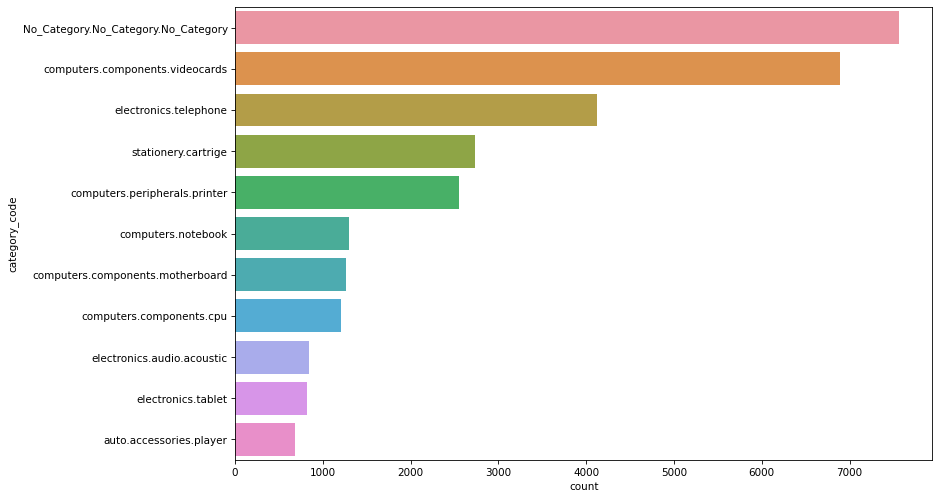

In [17]:
# membuat plot jenis produk yang paling banyak dibeli
plt.figure(figsize=(12,8),dpi=75)
ax = sns.countplot(data=data_category,y='category_code',order=data_category.category_code.value_counts().iloc[:11].index)
plt.show()

__observasi:__ Produk No_Category adalah produk yang tidak diketahui kategorinya. Produk yang paling banyak dibeli yang diketahui jenisnya adalah videocards (komponen komputer), sedangkan 10 jenis produk yang paling banyak dibeli bisa dilihat dari diagram diatas.

## Analisis kolom <mark>brand</mark>

In [18]:
# persiapkan data_brand yang akan di analisis
data_brand=data.copy()
data_brand=data_brand[data_brand['event_type']=='purchase'].reset_index(drop=True)

In [19]:
# membuat kolom baru brand_category untuk analisis brand 
brand_category=data_brand.groupby(['brand'])['category_code'].agg('nunique').reset_index()
brand_category.category_code=brand_category.category_code.apply(lambda x:'{:>5}'.format(x))
brand_category['brand_category']=brand_category.brand.astype(str)+brand_category.category_code.astype(str)
brand_category.sort_values('category_code',ascending=False).head(7)
map1=brand_category[['brand','brand_category']].set_index('brand').to_dict()['brand_category']
data_brand['brand_category']=data_brand['brand'].map(map1)
data_brand.head(3)

,user_id,user_session,product_id,category_code,price,brand,event_type,event_time,brand_category
0,1515915625519390468,xn6SHCnZtk,1507291,computers.components.power_supply,217.57,supermicro,purchase,2020-09-24 12:04:10 UTC,supermicro 4
1,1515915625513574486,2gngxS29Ts,822426,computers.peripherals.camera,123.35,logitech,purchase,2020-09-24 12:15:06 UTC,logitech 7
2,1515915625518130982,3yFCkx2KKW,4060928,electronics.video.tv,89.22,No Brand,purchase,2020-09-24 12:19:01 UTC,No Brand 55


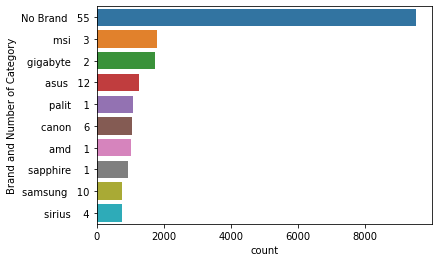

In [20]:
# melihat 10 brand yang produknya paling banyak terjual
ax = sns.countplot(data=data_brand,y='brand_category',order=data_brand.brand_category.value_counts().iloc[:10].index)
ax.set(ylabel='Brand and Number of Category')
plt.show()

In [21]:
# melihat apa saja kategori produk yang di jual 10 brand tersebut
top_10_brand=['msi','gigabyte','asus','palit','canon','amd','sapphire','samsung','sirius']
data_brand[['brand','category_code']][data_brand.brand.isin(top_10_brand)].sort_values(by=['brand']).drop_duplicates()

,brand,category_code
18004,amd,computers.components.cpu
18473,asus,computers.components.motherboard
26366,asus,computers.components.videocards
16842,asus,computers.peripherals.wifi
16268,asus,computers.components.cdrw
18082,asus,computers.peripherals.monitor
1196,asus,electronics.video.projector
1223,asus,electronics.tablet
11366,asus,computers.notebook
15034,asus,No_Category.No_Category.No_Category


In [22]:
# mengelompokkan top 10 brand dan top 10 kategori produk
brand_product_category = pd.DataFrame(np.array([['V', 'V', 'X','X','X','X','X','X','X','X']
                                                ,['V', 'V', 'X','X','X','X','X','X','X','X']
                                                ,['V', 'X', 'X','X','X','X','X','X','X','X']
                                                ,['V', 'X', 'X','X','X','X','X','X','X','X']
                                                ,['V', 'V', 'V','V','V','X','X','X','X','X']
                                                ,['X', 'X', 'V','V','V','X','X','X','X','X']
                                                ,['X', 'X', 'X','V','V','V','V','X','X','X']
                                                ,['X', 'X', 'X','X','X','V','V','X','X','X']
                                                ,['X', 'X', 'X','X','X','X','X','V','X','X']
                                               ])
                                      ,columns=['videocards','motherboard','notebook', 'telephone','tablet', 'printer','cartrige',    'cpu', 'acoustic audio',  'player (auto accessories)']
                                      ,index=['msi', 'gigabyte','palit','sapphire', 'asus','sirius','samsung' ,  'canon', 'amd'  ])
brand_product_category

,videocards,motherboard,notebook,telephone,tablet,printer,cartrige,cpu,acoustic audio,player (auto accessories)
msi,V,V,X,X,X,X,X,X,X,X
gigabyte,V,V,X,X,X,X,X,X,X,X
palit,V,X,X,X,X,X,X,X,X,X
sapphire,V,X,X,X,X,X,X,X,X,X
asus,V,V,V,V,V,X,X,X,X,X
sirius,X,X,V,V,V,X,X,X,X,X
samsung,X,X,X,V,V,V,V,X,X,X
canon,X,X,X,X,X,V,V,X,X,X
amd,X,X,X,X,X,X,X,V,X,X


__Observasi:__ 
1. Brand paling laku pertama sampai ke empat, semuanya menjual kategori produk paling laku yaitu videocard.
2. Brand-brand paling laku tersebut bisa di kelompokkan menjadi 4 kelompok yaitu brand yang fokus pada motherboard, videodcard, dan barang sejenisnya yaitu msi, gigabyte, palit, sapphire, asus. Kelompok yang fokus pada notebook,telephone, tablet, dan sejenisnya yaitu asus, sirius dan samsung. Kelompok yang fokus pada printer dan cartrige yaitu samsung dan canon, dan kelompok yang hanya fokus pada cpu yaitu amd.
3. Ada dua jenis kategori produk yang termasuk top 10 paling banyak dibeli tapi tidak dijual oleh top 10 brand yaitu audio akustik (barang elektronik) dan player (auto accessories).
4. Ada 3 brand yang masuk top 10 brand paling laku yang hanya menjual satu jenis kategori produk yaitu palit, sapphire dan amd.

## Analisis <mark>brand</mark> produk top 10 kategori produk

### Analisis <mark>brand</mark> produk videocards

In [23]:
# mencari top 10 produk untuk kategori produk videocards
indeks=data_brand['product_id'][data_brand.category_code=='computers.components.videocards'].value_counts().iloc[:10].index
data_brand_2=data_brand[['product_id','category_code','brand']][data_brand.product_id.isin(indeks)].sort_values('product_id').value_counts().reset_index()
data_brand_2=data_brand_2.rename(columns={0:'count'})
data_brand_2=data_brand_2[['brand','count']]
data_brand_2

,brand,count
0,gigabyte,564
1,No Brand,538
2,sapphire,384
3,msi,266
4,gigabyte,257
5,sapphire,196
6,msi,191
7,palit,169
8,powercolor,168
9,palit,149


In [24]:
# persentasi top 10 produk kategori videocards
data_brand_3=data_brand[data_brand.category_code=='computers.components.videocards']
data_brand_2['count'].sum(axis=0)/len(data_brand_3)

0.4184088269454123

In [25]:
# persentasi produk No Brand kategori produk videocards
len(data_brand_3[data_brand_3['brand']=='No Brand'])/len(data_brand_3)

0.09698025551684088

### Analisis <mark>brand</mark> produk telephone

In [26]:
# mencari top 10 produk untuk kategori produk telephone
indeks=data_brand['product_id'][data_brand.category_code=='electronics.telephone'].value_counts().iloc[:10].index
data_brand_2=data_brand[['product_id','category_code','brand']][data_brand.product_id.isin(indeks)].sort_values('product_id').value_counts().reset_index()
data_brand_2=data_brand_2.rename(columns={0:'count'})
data_brand_2=data_brand_2[['brand','count']]
data_brand_2

,brand,count
0,No Brand,543
1,sirius,121
2,No Brand,116
3,samsung,113
4,No Brand,97
5,sirius,86
6,No Brand,83
7,No Brand,71
8,sirius,54
9,No Brand,48


In [27]:
# persentasi top 10 produk kategori telephone
data_brand_3=data_brand[data_brand.category_code=='electronics.telephone']
data_brand_2['count'].sum(axis=0)/len(data_brand_3)

0.3233794610342316

In [28]:
# persentasi produk No Brand kategori produk telephone
len(data_brand_3[data_brand_3['brand']=='No Brand'])/len(data_brand_3)

0.6130128672007769

### Analisis <mark>brand</mark> produk cartrige

In [29]:
# mencari top 10 produk untuk kategori produk cartrige
indeks=data_brand['product_id'][data_brand.category_code=='stationery.cartrige'].value_counts().iloc[:10].index
data_brand_2=data_brand[['product_id','category_code','brand']][data_brand.product_id.isin(indeks)].sort_values('product_id').value_counts().reset_index()
data_brand_2=data_brand_2.rename(columns={0:'count'})
data_brand_2=data_brand_2[['brand','count']]
data_brand_2

,brand,count
0,hp,345
1,canon,207
2,nv-print,110
3,canon,83
4,nv-print,83
5,No Brand,77
6,No Brand,60
7,hp,50
8,hp,49
9,No Brand,45


In [30]:
# persentasi top 10 produk kategori cartrige
data_brand_3=data_brand[data_brand.category_code=='stationery.cartrige']
data_brand_2['count'].sum(axis=0)/len(data_brand_3)

0.4048922964585615

In [31]:
# persentasi produk No Brand kategori produk cartrige
len(data_brand_3[data_brand_3['brand']=='No Brand'])/len(data_brand_3)

0.3289521723256663

### Analisis <mark>brand</mark> produk printer

In [32]:
# mencari top 10 produk untuk kategori produk printer
indeks=data_brand['product_id'][data_brand.category_code=='computers.peripherals.printer'].value_counts().iloc[:10].index
data_brand_2=data_brand[['product_id','category_code','brand']][data_brand.product_id.isin(indeks)].sort_values('product_id').value_counts().reset_index()
data_brand_2=data_brand_2.rename(columns={0:'count'})
data_brand_2=data_brand_2[['brand','count']]
data_brand_2

,brand,count
0,canon,233
1,pantum,122
2,canon,94
3,canon,84
4,No Brand,79
5,epson,76
6,pantum,66
7,brother,65
8,xerox,48
9,canon,42


In [33]:
# persentasi top 10 produk kategori printer
data_brand_3=data_brand[data_brand.category_code=='computers.peripherals.printer']
data_brand_2['count'].sum(axis=0)/len(data_brand_3)

0.35549472037543994

In [34]:
# persentasi produk No Brand kategori produk printer
len(data_brand_3[data_brand_3['brand']=='No Brand'])/len(data_brand_3)

0.2182244818146265

### Analisis <mark>brand</mark> produk notebook

In [35]:
# mencari top 10 produk untuk kategori produk notebook
indeks=data_brand['product_id'][data_brand.category_code=='computers.notebook'].value_counts().iloc[:10].index
data_brand_2=data_brand[['product_id','category_code','brand']][data_brand.product_id.isin(indeks)].sort_values('product_id').value_counts().reset_index()
data_brand_2=data_brand_2.rename(columns={0:'count'})
data_brand_2=data_brand_2[['brand','count']]
data_brand_2

,brand,count
0,mobilepc,95
1,No Brand,46
2,topon,46
3,No Brand,34
4,No Brand,33
5,mobilepc,30
6,No Brand,24
7,pitatel,21
8,palmexx,19
9,mobilepc,18


In [36]:
# persentasi top 10 produk kategori notebook
data_brand_3=data_brand[data_brand.category_code=='computers.notebook']
data_brand_2['count'].sum(axis=0)/len(data_brand_3)

0.28218966846569005

In [37]:
# persentasi produk No Brand kategori produk notebook
len(data_brand_3[data_brand_3['brand']=='No Brand'])/len(data_brand_3)

0.28064764841942946

### Analisis <mark>brand</mark> produk motherboard

In [38]:
# mencari top 10 produk untuk kategori produk motherboard
indeks=data_brand['product_id'][data_brand.category_code=='computers.components.motherboard'].value_counts().iloc[:10].index
data_brand_2=data_brand[['product_id','category_code','brand']][data_brand.product_id.isin(indeks)].sort_values('product_id').value_counts().reset_index()
data_brand_2=data_brand_2.rename(columns={0:'count'})
data_brand_2=data_brand_2[['brand','count']]
data_brand_2

,brand,count
0,asrock,194
1,asus,187
2,asrock,125
3,asus,89
4,gigabyte,62
5,gigabyte,49
6,gigabyte,41
7,asrock,40
8,asus,36
9,asus,30


In [39]:
# persentasi top 10 produk kategori motherboard
data_brand_3=data_brand[data_brand.category_code=='computers.components.motherboard']
data_brand_2['count'].sum(axis=0)/len(data_brand_3)

0.6737756714060031

In [40]:
# persentasi produk No Brand kategori produk motherboard
len(data_brand_3[data_brand_3['brand']=='No Brand'])/len(data_brand_3)

0.0

### Analisis <mark>brand</mark> produk cpu

In [41]:
# mencari top 10 produk untuk kategori produk cpu
indeks=data_brand['product_id'][data_brand.category_code=='computers.components.cpu'].value_counts().iloc[:10].index
data_brand_2=data_brand[['product_id','category_code','brand']][data_brand.product_id.isin(indeks)].sort_values('product_id').value_counts().reset_index()
data_brand_2=data_brand_2.rename(columns={0:'count'})
data_brand_2=data_brand_2[['brand','count']]
data_brand_2

,brand,count
0,amd,423
1,amd,96
2,amd,79
3,amd,69
4,intel,58
5,amd,56
6,amd,32
7,amd,29
8,amd,27
9,amd,26


In [42]:
# persentasi top 10 produk kategori cpu
data_brand_3=data_brand[data_brand.category_code=='computers.components.cpu']
data_brand_2['count'].sum(axis=0)/len(data_brand_3)

0.7378400659521847

In [43]:
# persentasi produk No Brand kategori produk cpu
len(data_brand_3[data_brand_3['brand']=='No Brand'])/len(data_brand_3)

0.0

### Analisis <mark>brand</mark> produk acoustic audio

In [44]:
# mencari top 10 produk untuk kategori produk acoustic audio
indeks=data_brand['product_id'][data_brand.category_code=='electronics.audio.acoustic'].value_counts().iloc[:10].index
data_brand_2=data_brand[['product_id','category_code','brand']][data_brand.product_id.isin(indeks)].sort_values('product_id').value_counts().reset_index()
data_brand_2=data_brand_2.rename(columns={0:'count'})
data_brand_2=data_brand_2[['brand','count']]
data_brand_2

,brand,count
0,edifier,76
1,edifier,61
2,edifier,43
3,jbl,33
4,edifier,30
5,pioneer,19
6,morel,19
7,pioneer,19
8,dialog,17
9,edifier,17


In [45]:
# persentasi top 10 produk kategori acoustic audio
data_brand_3=data_brand[data_brand.category_code=='electronics.audio.acoustic']
data_brand_2['count'].sum(axis=0)/len(data_brand_3)

0.3938679245283019

In [46]:
# persentasi produk No Brand kategori produk acoustic audio
len(data_brand_3[data_brand_3['brand']=='No Brand'])/len(data_brand_3)

0.036556603773584904

### Analisis <mark>brand</mark> produk tablet

In [47]:
# mencari top 10 produk untuk kategori produk tablet
indeks=data_brand['product_id'][data_brand.category_code=='electronics.tablet'].value_counts().iloc[:10].index
data_brand_2=data_brand[['product_id','category_code','brand']][data_brand.product_id.isin(indeks)].sort_values('product_id').value_counts().reset_index()
data_brand_2=data_brand_2.rename(columns={0:'count'})
data_brand_2=data_brand_2[['brand','count']]
data_brand_2

,brand,count
0,samsung,67
1,xiaomi,58
2,irbis,40
3,digma,34
4,samsung,31
5,samsung,28
6,samsung,24
7,samsung,16
8,samsung,15
9,No Brand,14


In [48]:
# persentasi top 10 produk kategori tablet
data_brand_3=data_brand[data_brand.category_code=='electronics.tablet']
data_brand_2['count'].sum(axis=0)/len(data_brand_3)

0.3992673992673993

In [49]:
# persentasi produk No Brand kategori produk tablet
len(data_brand_3[data_brand_3['brand']=='No Brand'])/len(data_brand_3)

0.3492063492063492

### Analisis <mark>brand</mark> produk auto accessories player

In [50]:
# mencari top 10 produk untuk kategori produk auto accessories player
indeks=data_brand['product_id'][data_brand.category_code=='auto.accessories.player'].value_counts().iloc[:10].index
data_brand_2=data_brand[['product_id','category_code','brand']][data_brand.product_id.isin(indeks)].sort_values('product_id').value_counts().reset_index()
data_brand_2=data_brand_2.rename(columns={0:'count'})
data_brand_2=data_brand_2[['brand','count']]
data_brand_2

,brand,count
0,pioneer,180
1,kenwood,68
2,pioneer,50
3,kenwood,32
4,jvc,31
5,pioneer,26
6,alpine,21
7,sony,21
8,jvc,19
9,prology,12


In [51]:
# persentasi top 10 produk kategori auto accessories player
data_brand_3=data_brand[data_brand.category_code=='auto.accessories.player']
data_brand_2['count'].sum(axis=0)/len(data_brand_3)

0.6715328467153284

In [52]:
# persentasi produk No Brand kategori produk auto accessories player
len(data_brand_3[data_brand_3['brand']=='No Brand'])/len(data_brand_3)

0.0

### Kesimpulan analisis brand dari top 10 produk

In [53]:
# membuat tabel kesimpulan analisis brand dari top 10 produk
brand_top_10_produk = pd.DataFrame(np.array([['gigabyte, No Brand, sapphire','10%']
                                             ,['No Brand, sirius, No Brand',  '61%']
                                             ,['hp, canon, nv-print','33%']
                                             ,['canon, pantum, canon','22%']
                                             ,['mobilepc, No Brand, topon', '28%']
                                             ,['asrock, asus, asrock', '0%']
                                             ,['amd, amd, amd', '0%']
                                             ,['edifer, edifer, edifer', '4%']
                                             ,['samsung, xiaomi, irbis', '35%']
                                             ,['pioneer, kenwood, pioneer', '0%']
                                            ])
                                      ,columns=['Top 3 Brand','Persentase No Brand']
                                      ,index=['videocards','telephone','cartrige','printer','notebook','motherboard',
                                              'cpu', 'acoustic audio','tablet',  'player (auto accessories)'])
brand_top_10_produk                                            

,Top 3 Brand,Persentase No Brand
videocards,"gigabyte, No Brand, sapphire",10%
telephone,"No Brand, sirius, No Brand",61%
cartrige,"hp, canon, nv-print",33%
printer,"canon, pantum, canon",22%
notebook,"mobilepc, No Brand, topon",28%
motherboard,"asrock, asus, asrock",0%
cpu,"amd, amd, amd",0%
acoustic audio,"edifer, edifer, edifer",4%
tablet,"samsung, xiaomi, irbis",35%
player (auto accessories),"pioneer, kenwood, pioneer",0%


__Observasi:__
1. Tiga brand untuk tiap tiga produk teratas di tiap kategori bisa dilihat dalam tabel diatas dan persentase produk yang tidak punya brand bisa dilihat di kolom berikutnya.
2. No Brand maksudnya adalah brand produk tersebut belum terdaftar di toko online, bisa jadi karena brand tersebut adalah brand baru.
3. Kategori produk yang persentase No Brand-nya tinggi menunjukkan pembeli di kategori tersebut tidak terlalu mementingkan brand terkenal dalam pembelian produknya.
4. Tiap kategori produk tidak menunjukkan hanya satu jenis produk, contohnya adalah brand topon pada kategori notebook yang fokus dalam menjual baterai notebook, bukan notebook.

## Analisis kolom <mark>price</mark>

Sayangnya satuan harga tiap produk tidak dicantumkan dalam data maupun [website penyedia data](https://www.kaggle.com/datasets/mkechinov/ecommerce-events-history-in-electronics-store?resource=download) tersebut, namun bila dilihat dari harga tiap barangnya, bisa diperkirakan bahwa satuan harga yang digunakan adalah USD. 

In [54]:
# melihat apakah ada data kolom price yang missing value
data['price'].isnull().sum()

0

In [55]:
# persiapkan data_price yang akan di analisis
data_price=data.copy()
data_price=data_price[data_price['event_type']=='purchase'].reset_index(drop=True)
data_price.head(3)

,user_id,user_session,product_id,category_code,price,brand,event_type,event_time
0,1515915625519390468,xn6SHCnZtk,1507291,computers.components.power_supply,217.57,supermicro,purchase,2020-09-24 12:04:10 UTC
1,1515915625513574486,2gngxS29Ts,822426,computers.peripherals.camera,123.35,logitech,purchase,2020-09-24 12:15:06 UTC
2,1515915625518130982,3yFCkx2KKW,4060928,electronics.video.tv,89.22,No Brand,purchase,2020-09-24 12:19:01 UTC


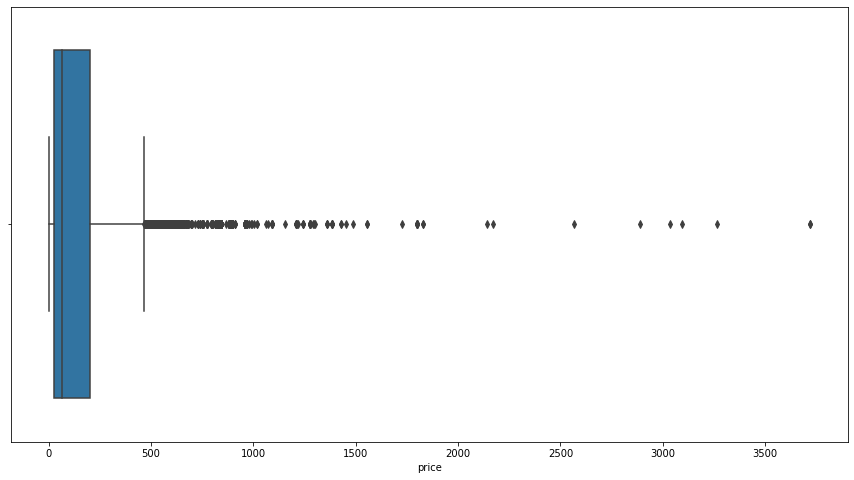

In [56]:
# melihat persebaran harga barang yang dibeli
plt.figure(figsize=(15,8))
ax = sns.boxplot(data=data_price,x='price')
plt.show()


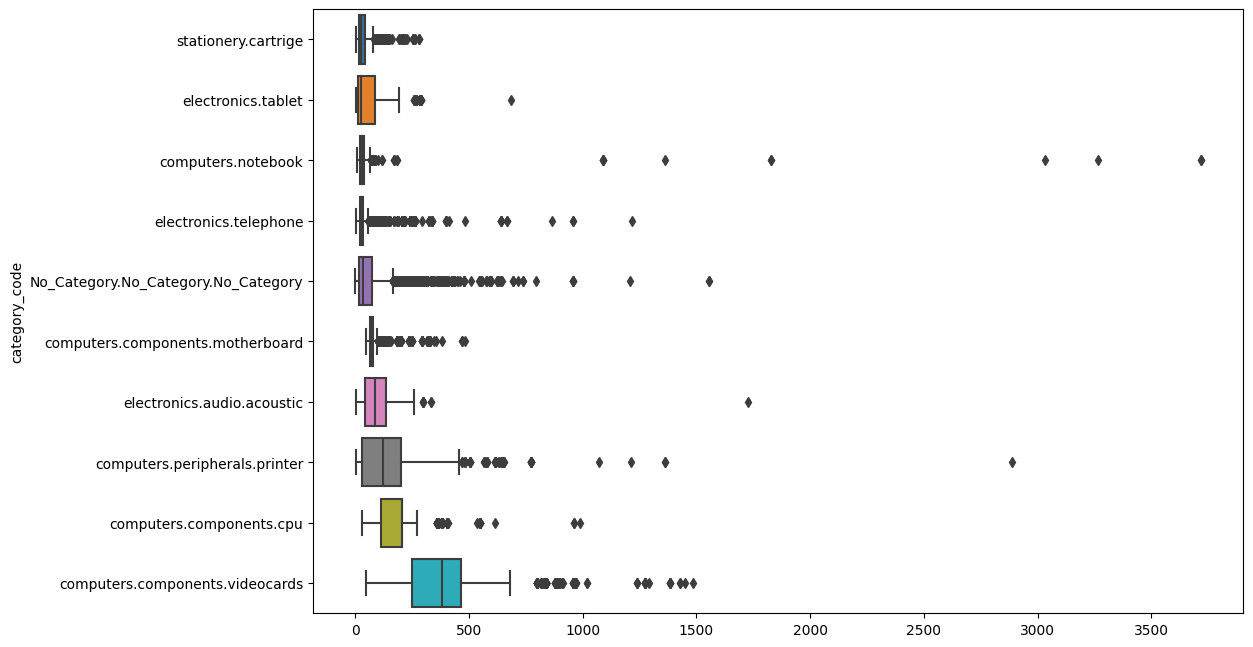

In [57]:
# melihat persebaran harga untuk 10 kategori produk yang paling banyak di beli
category_10=data_price['category_code'].value_counts().head(10).reset_index()
category_10_list=[]
for i in range(0,len(category_10)):
    category_10_list+=[category_10.iloc[i][0]]

plt.figure(figsize=(12,8),dpi=100)
data_price_10=data_price[data_price['category_code'].isin(category_10_list)]
data_price_10p=pd.pivot_table(data=data_price_10,values='price',columns=['category_code'],index=['user_id','user_session','product_id','event_time'])
index_sort=data_price_10p.median().sort_values().index
data_price_10p=data_price_10p[index_sort]

ax=sns.boxplot(data=data_price_10p,orient='h')
plt.show()

__observasi:__ Untuk 10 kategori produk terpopuler, bisa dilihat bahwa kebanyakan produk yang dibeli adalah barang yang harganya cukup murah jika dibandingkan dengan rentang harga paling mahal barang tersebut. Analisis lebih dalam dilakukan pada analisis berikutnya yaitu analisis <mark>price</mark> untuk top 10 kategori produk.

## Analisis <mark>price</mark> produk top 10 kategori produk

### Analisis <mark>price</mark> produk videocards

In [58]:
# mencari top 10 produk untuk kategori produk videocards
indeks=data_price['product_id'][data_price.category_code=='computers.components.videocards'].value_counts().iloc[:10].index
data_price_2=data_price[['product_id','category_code','brand','price']][data_price.product_id.isin(indeks)].sort_values('product_id').value_counts().reset_index()
data_price_2=data_price_2.rename(columns={0:'count'})
cheaper=[]
for i in range(0,len(data_price_2)):
    cheaper+=['%.2f%%'%((data_price_2['count'][data_price_2['price']<data_price_2['price'].iloc[i]].sum()/(data_price_2['count'].sum()))*100)]
data_price_2['cheaper_percentage']=cheaper
kesimpulan=data_price_2.iloc[0:3]
data_price_2

,product_id,category_code,brand,price,count,cheaper_percentage
0,4099645,computers.components.videocards,gigabyte,292.83,564,22.24%
1,1821813,computers.components.videocards,No Brand,397.48,538,51.04%
2,893196,computers.components.videocards,sapphire,214.10,384,8.92%
3,4102739,computers.components.videocards,msi,294.41,266,41.81%
4,4154414,computers.components.videocards,gigabyte,202.67,257,0.00%
5,4078916,computers.components.videocards,sapphire,415.54,196,75.54%
6,4079420,computers.components.videocards,msi,449.51,191,82.34%
7,1830099,computers.components.videocards,palit,486.81,169,94.14%
8,4079061,computers.components.videocards,powercolor,399.48,168,69.71%
9,3791509,computers.components.videocards,palit,466.52,149,88.97%


### Analisis <mark>price</mark> produk telephone

In [59]:
# mencari top 10 produk untuk kategori produk telephone
indeks=data_price['product_id'][data_price.category_code=='electronics.telephone'].value_counts().iloc[:10].index
data_price_2=data_price[['product_id','category_code','brand','price']][data_price.product_id.isin(indeks)].sort_values('product_id').value_counts().reset_index()
data_price_2=data_price_2.rename(columns={0:'count'})
cheaper=[]
for i in range(0,len(data_price_2)):
    cheaper+=['%.2f%%'%((data_price_2['count'][data_price_2['price']<data_price_2['price'].iloc[i]].sum()/(data_price_2['count'].sum()))*100)]
data_price_2['cheaper_percentage']=cheaper
kesimpulan=kesimpulan.append(data_price_2.iloc[0:3])
data_price_2

,product_id,category_code,brand,price,count,cheaper_percentage
0,3829355,electronics.telephone,No Brand,32.22,543,38.44%
1,1821557,electronics.telephone,sirius,16.19,121,6.23%
2,3632668,electronics.telephone,No Brand,34.44,116,82.81%
3,3828891,electronics.telephone,samsung,51.33,113,91.52%
4,3537322,electronics.telephone,No Brand,27.62,97,31.16%
5,4013582,electronics.telephone,sirius,26.98,86,24.70%
6,1660034,electronics.telephone,No Brand,10.43,83,0.00%
7,3829374,electronics.telephone,No Brand,21.43,71,15.32%
8,3755038,electronics.telephone,sirius,23.48,54,20.65%
9,3537391,electronics.telephone,No Brand,32.38,48,79.20%


### Analisis <mark>price</mark> produk cartrige

In [60]:
# mencari top 10 produk untuk kategori produk cartrige
indeks=data_price['product_id'][data_price.category_code=='stationery.cartrige'].value_counts().iloc[:10].index
data_price_2=data_price[['product_id','category_code','brand','price']][data_price.product_id.isin(indeks)].sort_values('product_id').value_counts().reset_index()
data_price_2=data_price_2.rename(columns={0:'count'})
cheaper=[]
for i in range(0,len(data_price_2)):
    cheaper+=['%.2f%%'%((data_price_2['count'][data_price_2['price']<data_price_2['price'].iloc[i]].sum()/(data_price_2['count'].sum()))*100)]
data_price_2['cheaper_percentage']=cheaper
kesimpulan=kesimpulan.append(data_price_2.iloc[0:3])
data_price_2

,product_id,category_code,brand,price,count,cheaper_percentage
0,3642540,stationery.cartrige,hp,26.19,345,21.91%
1,1785245,stationery.cartrige,canon,43.11,207,69.79%
2,471387,stationery.cartrige,nv-print,13.86,110,0.00%
3,1785246,stationery.cartrige,canon,45.24,83,88.46%
4,885572,stationery.cartrige,nv-print,21.21,83,9.92%
5,802811,stationery.cartrige,No Brand,42.98,77,62.85%
6,1856480,stationery.cartrige,No Brand,36.14,60,57.44%
7,8093,stationery.cartrige,hp,23.17,50,17.40%
8,623426,stationery.cartrige,hp,29.57,49,53.02%
9,367956,stationery.cartrige,No Brand,205.49,45,95.94%


### Analisis <mark>price</mark> produk printer

In [61]:
# mencari top 10 produk untuk kategori produk printer
indeks=data_price['product_id'][data_price.category_code=='computers.peripherals.printer'].value_counts().iloc[:10].index
data_price_2=data_price[['product_id','category_code','brand','price']][data_price.product_id.isin(indeks)].sort_values('product_id').value_counts().reset_index()
data_price_2=data_price_2.rename(columns={0:'count'})
cheaper=[]
for i in range(0,len(data_price_2)):
    cheaper+=['%.2f%%'%((data_price_2['count'][data_price_2['price']<data_price_2['price'].iloc[i]].sum()/(data_price_2['count'].sum()))*100)]
data_price_2['cheaper_percentage']=cheaper
kesimpulan=kesimpulan.append(data_price_2.iloc[0:3])
data_price_2

,product_id,category_code,brand,price,count,cheaper_percentage
0,799067,computers.peripherals.printer,canon,82.97,233,8.69%
1,3829912,computers.peripherals.printer,pantum,122.86,122,41.58%
2,3790736,computers.peripherals.printer,canon,163.52,94,55.01%
3,3759997,computers.peripherals.printer,canon,192.86,84,65.35%
4,1341995,computers.peripherals.printer,No Brand,15.10,79,0.00%
5,4013522,computers.peripherals.printer,epson,229.38,76,87.02%
6,1757030,computers.peripherals.printer,pantum,118.57,66,34.32%
7,1423328,computers.peripherals.printer,brother,199.37,65,74.59%
8,889263,computers.peripherals.printer,xerox,203.02,48,81.74%
9,3760001,computers.peripherals.printer,canon,314.68,42,95.38%


### Analisis <mark>price</mark> produk notebook

In [62]:
# mencari top 10 produk untuk kategori produk notebook
indeks=data_price['product_id'][data_price.category_code=='computers.notebook'].value_counts().iloc[:10].index
data_price_2=data_price[['product_id','category_code','brand','price']][data_price.product_id.isin(indeks)].sort_values('product_id').value_counts().reset_index()
data_price_2=data_price_2.rename(columns={0:'count'})
cheaper=[]
for i in range(0,len(data_price_2)):
    cheaper+=['%.2f%%'%((data_price_2['count'][data_price_2['price']<data_price_2['price'].iloc[i]].sum()/(data_price_2['count'].sum()))*100)]
data_price_2['cheaper_percentage']=cheaper
kesimpulan=kesimpulan.append(data_price_2.iloc[0:3])
data_price_2

,product_id,category_code,brand,price,count,cheaper_percentage
0,1044616,computers.notebook,mobilepc,22.22,95,9.29%
1,3627467,computers.notebook,No Brand,31.11,46,45.36%
2,1006967,computers.notebook,topon,55.87,46,87.43%
3,608114,computers.notebook,No Brand,10.84,34,0.00%
4,636610,computers.notebook,No Brand,51.75,33,72.68%
5,1586099,computers.notebook,mobilepc,35.08,30,57.92%
6,338823,computers.notebook,No Brand,46.98,24,66.12%
7,1578114,computers.notebook,pitatel,52.86,21,81.69%
8,466153,computers.notebook,palmexx,28.10,19,40.16%
9,879803,computers.notebook,mobilepc,25.08,18,35.25%


### Analisis <mark>price</mark> produk motherboard

In [63]:
# mencari top 10 produk untuk kategori produk motherboard
indeks=data_price['product_id'][data_price.category_code=='computers.components.motherboard'].value_counts().iloc[:10].index
data_price_2=data_price[['product_id','category_code','brand','price']][data_price.product_id.isin(indeks)].sort_values('product_id').value_counts().reset_index()
data_price_2=data_price_2.rename(columns={0:'count'})
cheaper=[]
for i in range(0,len(data_price_2)):
    cheaper+=['%.2f%%'%((data_price_2['count'][data_price_2['price']<data_price_2['price'].iloc[i]].sum()/(data_price_2['count'].sum()))*100)]
data_price_2['cheaper_percentage']=cheaper
kesimpulan=kesimpulan.append(data_price_2.iloc[0:3])
data_price_2

,product_id,category_code,brand,price,count,cheaper_percentage
0,136700,computers.components.motherboard,asrock,77.73,194,69.05%
1,809948,computers.components.motherboard,asus,64.48,187,26.73%
2,523117,computers.components.motherboard,asrock,73.81,125,54.40%
3,137302,computers.components.motherboard,asus,55.16,89,11.49%
4,1017163,computers.components.motherboard,gigabyte,48.27,62,0.00%
5,1850104,computers.components.motherboard,gigabyte,67.97,49,48.65%
6,1271563,computers.components.motherboard,gigabyte,63.98,41,21.92%
7,3606492,computers.components.motherboard,asrock,81.14,40,91.79%
8,478724,computers.components.motherboard,asus,52.90,36,7.27%
9,840623,computers.components.motherboard,asus,82.33,30,96.48%


### Analisis <mark>price</mark> produk cpu

In [64]:
# mencari top 10 produk untuk kategori produk cpu
indeks=data_price['product_id'][data_price.category_code=='computers.components.cpu'].value_counts().iloc[:10].index
data_price_2=data_price[['product_id','category_code','brand','price']][data_price.product_id.isin(indeks)].sort_values('product_id').value_counts().reset_index()
data_price_2=data_price_2.rename(columns={0:'count'})
cheaper=[]
for i in range(0,len(data_price_2)):
    cheaper+=['%.2f%%'%((data_price_2['count'][data_price_2['price']<data_price_2['price'].iloc[i]].sum()/(data_price_2['count'].sum()))*100)]
data_price_2['cheaper_percentage']=cheaper
kesimpulan=kesimpulan.append(data_price_2.iloc[0:3])
data_price_2

,product_id,category_code,brand,price,count,cheaper_percentage
0,3791351,computers.components.cpu,amd,204.29,423,40.22%
1,942339,computers.components.cpu,amd,56.27,96,0.00%
2,3804514,computers.components.cpu,amd,140.86,79,27.82%
3,1413340,computers.components.cpu,amd,137.63,69,20.11%
4,3804563,computers.components.cpu,intel,97.35,58,13.63%
5,3791403,computers.components.cpu,amd,236.97,56,87.49%
6,3791077,computers.components.cpu,amd,173.86,32,36.65%
7,3791400,computers.components.cpu,amd,381.46,29,96.76%
8,4078407,computers.components.cpu,amd,365.38,27,93.74%
9,3791079,computers.components.cpu,amd,96.86,26,10.73%


### Analisis <mark>price</mark> produk acoustic audio

In [65]:
# mencari top 10 produk untuk kategori produk acoustic audio
indeks=data_price['product_id'][data_price.category_code=='electronics.audio.acoustic'].value_counts().iloc[:10].index
data_price_2=data_price[['product_id','category_code','brand','price']][data_price.product_id.isin(indeks)].sort_values('product_id').value_counts().reset_index()
data_price_2=data_price_2.rename(columns={0:'count'})
cheaper=[]
for i in range(0,len(data_price_2)):
    cheaper+=['%.2f%%'%((data_price_2['count'][data_price_2['price']<data_price_2['price'].iloc[i]].sum()/(data_price_2['count'].sum()))*100)]
data_price_2['cheaper_percentage']=cheaper
kesimpulan=kesimpulan.append(data_price_2.iloc[0:3])
data_price_2

,product_id,category_code,brand,price,count,cheaper_percentage
0,1271550,electronics.audio.acoustic,edifier,84.89,76,14.97%
1,124712,electronics.audio.acoustic,edifier,204.79,61,67.07%
2,471287,electronics.audio.acoustic,edifier,117.75,43,48.50%
3,3699987,electronics.audio.acoustic,jbl,43.13,33,0.00%
4,1724625,electronics.audio.acoustic,edifier,259.94,30,91.02%
5,1250496,electronics.audio.acoustic,pioneer,150.65,19,61.38%
6,87414,electronics.audio.acoustic,morel,113.81,19,42.81%
7,85962,electronics.audio.acoustic,pioneer,227.30,19,85.33%
8,908273,electronics.audio.acoustic,dialog,107.33,17,37.72%
9,460841,electronics.audio.acoustic,edifier,69.54,17,9.88%


### Analisis <mark>price</mark> produk tablet

In [66]:
# mencari top 10 produk untuk kategori produk tablet
indeks=data_price['product_id'][data_price.category_code=='electronics.tablet'].value_counts().iloc[:10].index
data_price_2=data_price[['product_id','category_code','brand','price']][data_price.product_id.isin(indeks)].sort_values('product_id').value_counts().reset_index()
data_price_2=data_price_2.rename(columns={0:'count'})
cheaper=[]
for i in range(0,len(data_price_2)):
    cheaper+=['%.2f%%'%((data_price_2['count'][data_price_2['price']<data_price_2['price'].iloc[i]].sum()/(data_price_2['count'].sum()))*100)]
data_price_2['cheaper_percentage']=cheaper
kesimpulan=kesimpulan.append(data_price_2.iloc[0:3])
data_price_2

,product_id,category_code,brand,price,count,cheaper_percentage
0,3829572,electronics.tablet,samsung,57.62,67,30.58%
1,1578612,electronics.tablet,xiaomi,284.30,58,82.26%
2,1804316,electronics.tablet,irbis,127.08,40,70.03%
3,4156062,electronics.tablet,digma,107.79,34,59.63%
4,957591,electronics.tablet,samsung,18.41,31,4.28%
5,3616980,electronics.tablet,samsung,86.16,28,51.07%
6,3829009,electronics.tablet,samsung,53.90,24,18.35%
7,3616976,electronics.tablet,samsung,57.13,16,25.69%
8,1428320,electronics.tablet,samsung,18.57,15,13.76%
9,252464,electronics.tablet,No Brand,1.57,14,0.00%


### Analisis <mark>price</mark> produk auto accessories player

In [67]:
# mencari top 10 produk untuk kategori produk auto accessories player
indeks=data_price['product_id'][data_price.category_code=='auto.accessories.player'].value_counts().iloc[:10].index
data_price_2=data_price[['product_id','category_code','brand','price']][data_price.product_id.isin(indeks)].sort_values('product_id').value_counts().reset_index()
data_price_2=data_price_2.rename(columns={0:'count'})
cheaper=[]
for i in range(0,len(data_price_2)):
    cheaper+=['%.2f%%'%((data_price_2['count'][data_price_2['price']<data_price_2['price'].iloc[i]].sum()/(data_price_2['count'].sum()))*100)]
data_price_2['cheaper_percentage']=cheaper
kesimpulan=kesimpulan.append(data_price_2.iloc[0:3])
data_price_2

,product_id,category_code,brand,price,count,cheaper_percentage
0,4099764,auto.accessories.player,pioneer,126.68,180,36.09%
1,4100427,auto.accessories.player,kenwood,104.86,68,11.09%
2,1843507,auto.accessories.player,pioneer,153.83,50,84.57%
3,4101476,auto.accessories.player,kenwood,93.43,32,0.00%
4,4154167,auto.accessories.player,jvc,133.03,31,75.22%
5,4079501,auto.accessories.player,pioneer,115.71,26,30.43%
6,3648340,auto.accessories.player,alpine,110.95,21,25.87%
7,1676906,auto.accessories.player,sony,218.98,21,95.43%
8,4154168,auto.accessories.player,jvc,99.92,19,6.96%
9,1007253,auto.accessories.player,prology,134.46,12,81.96%


### Kesimpulan analisis <mark>price</mark> top 10 kategori produk

In [68]:
# mengeluarkan tabel kesimpulan analisis price top 10 kategori produk
kesimpulan

,product_id,category_code,brand,price,count,cheaper_percentage
0,4099645,computers.components.videocards,gigabyte,292.83,564,22.24%
1,1821813,computers.components.videocards,No Brand,397.48,538,51.04%
2,893196,computers.components.videocards,sapphire,214.10,384,8.92%
0,3829355,electronics.telephone,No Brand,32.22,543,38.44%
1,1821557,electronics.telephone,sirius,16.19,121,6.23%
2,3632668,electronics.telephone,No Brand,34.44,116,82.81%
0,3642540,stationery.cartrige,hp,26.19,345,21.91%
1,1785245,stationery.cartrige,canon,43.11,207,69.79%
2,471387,stationery.cartrige,nv-print,13.86,110,0.00%
0,799067,computers.peripherals.printer,canon,82.97,233,8.69%


__Observasi:__
1. Tabel diatas menggambarkan harga tiap 3 produk terlaris dan persentase murahnya untuk tiap kategori dalam top 10 kateogori produk.
2. Persentase murah didefinisikan sebagai persentase barang terjual yang lebih murah dari barang tersebut.
3. Dari tabel diatas, terlihat bahwa hampir semua produk paling laris adalah barang yang harganya jauh lebih murah dari 50% barang yang terjual dikategori yang sama. 
4. Pengecualian untuk kesimpulan nomor tiga adalah kategori motherboard dimana produk paling laris adalah produk yang harganya cukup mahal dan 70% produk terjual di kategori yang sama harganya lebih murah serta cpu yang harganya cukup mahal dan sekitar 40% produk terjual di kategori yang sama harganya lebih murah.
5. Dari tabel diatas juga terlihat bahwa untuk hampir semua tiga produk terlaris, salah satunya adalah produk yang harganya diatas 50% produk terjual di kateogori yang sama, hal ini menunjukkan bahwa harga adalah penentu namun bukan satu-satunya penentu dalam pembelian barang.

## Analisis kolom <mark>activity</mark>

In [69]:
# persiapkan data_category yang akan di analisis
data_activity=data.copy()
data_activity.event_type.isnull().sum()

0

In [70]:
# persiapkan data purchase
data_activity_purchase=data_activity[data_activity['event_type']=='purchase'].groupby(['product_id','category_code'])['event_type'].agg('count').sort_values(ascending=False).reset_index()
data_activity_purchase.rename(columns={'event_type':'purchase_count'},inplace=True)
data_activity_purchase['rank_purchase']=data_activity_purchase.index+1
index_purchase_10=data_activity_purchase['product_id'].head(10).tolist()
data_activity_purchase

,product_id,category_code,purchase_count,rank_purchase
0,4099645,computers.components.videocards,564,1
1,3829355,electronics.telephone,543,2
2,1821813,computers.components.videocards,538,3
3,3791351,computers.components.cpu,423,4
4,893196,computers.components.videocards,384,5
...,...,...,...,...
6430,1666522,construction.tools.saw,1,6431
6431,779865,computers.components.videocards,1,6432
6432,1666539,appliances.kitchen.kettle,1,6433
6433,779454,No_Category.No_Category.No_Category,1,6434


In [71]:
# persiapkan data view
data_activity_view=data_activity[data_activity['event_type']=='view'].groupby(['product_id','category_code'])['event_type'].agg('count').sort_values(ascending=False).reset_index()
data_activity_view.rename(columns={'event_type':'view_count'},inplace=True)
data_activity_view['rank_view']=data_activity_view.index+1
index_view_10=data_activity_view['product_id'].head(10).tolist()
data_activity_view

,product_id,category_code,view_count,rank_view
0,1821813,computers.components.videocards,12794,1
1,3791351,computers.components.cpu,5717,2
2,4099645,computers.components.videocards,5489,3
3,1785245,stationery.cartrige,4630,4
4,3829355,electronics.telephone,4552,5
...,...,...,...,...
53447,593778,No_Category.No_Category.No_Category,1,53448
53448,593763,No_Category.No_Category.No_Category,1,53449
53449,1247933,electronics.telephone,1,53450
53450,4044568,construction.tools.light,1,53451


In [72]:
# persiapkan data cart
data_activity_cart=data_activity[data_activity['event_type']=='cart'].groupby(['product_id','category_code'])['event_type'].agg('count').sort_values(ascending=False).reset_index()
data_activity_cart.rename(columns={'event_type':'cart_count'},inplace=True)
data_activity_cart['rank_cart']=data_activity_cart.index+1
index_cart_10=data_activity_cart['product_id'].head(10).tolist()
data_activity_cart

,product_id,category_code,cart_count,rank_cart
0,1821813,computers.components.videocards,1220,1
1,4099645,computers.components.videocards,1033,2
2,3791351,computers.components.cpu,761,3
3,3829355,electronics.telephone,664,4
4,893196,computers.components.videocards,662,5
...,...,...,...,...
9728,3671166,appliances.kitchen.mixer,1,9729
9729,884010,No_Category.No_Category.No_Category,1,9730
9730,3668086,stationery.cartrige,1,9731
9731,884091,auto.accessories.gps,1,9732


In [73]:
# buat tabel top 10 purchase
top_10_purchase=data_activity_purchase[data_activity_purchase['product_id'].isin(index_purchase_10)]
top_10_purchase=pd.concat([top_10_purchase,data_activity_view[data_activity_view['product_id'].isin(index_purchase_10)][['view_count','rank_view']].reset_index(drop=True)],axis=1)
top_10_purchase=pd.concat([top_10_purchase,data_activity_cart[data_activity_cart['product_id'].isin(index_purchase_10)][['cart_count','rank_cart']].reset_index(drop=True)],axis=1)
top_10_purchase

,product_id,category_code,purchase_count,rank_purchase,view_count,rank_view,cart_count,rank_cart
0,4099645,computers.components.videocards,564,1,12794,1,1220,1
1,3829355,electronics.telephone,543,2,5717,2,1033,2
2,1821813,computers.components.videocards,538,3,5489,3,761,3
3,3791351,computers.components.cpu,423,4,4552,5,664,4
4,893196,computers.components.videocards,384,5,3000,9,662,5
5,3642540,stationery.cartrige,345,6,2865,10,492,6
6,4102739,computers.components.videocards,266,7,2636,11,450,7
7,287525,No_Category.No_Category.No_Category,261,8,2242,14,318,10
8,4154414,computers.components.videocards,257,9,1794,18,294,13
9,246841,No_Category.No_Category.No_Category,242,10,1483,26,239,19


In [74]:
# buat tabel top 10 view
top_10_view=data_activity_view[data_activity_view['product_id'].isin(index_view_10)]
top_10_view=pd.concat([top_10_view,data_activity_purchase[data_activity_purchase['product_id'].isin(index_view_10)][['purchase_count','rank_purchase']].reset_index(drop=True)],axis=1)
top_10_view=pd.concat([top_10_view,data_activity_cart[data_activity_cart['product_id'].isin(index_purchase_10)][['cart_count','rank_cart']].reset_index(drop=True)],axis=1)
top_10_view

,product_id,category_code,view_count,rank_view,purchase_count,rank_purchase,cart_count,rank_cart
0,1821813,computers.components.videocards,12794,1,564,1,1220,1
1,3791351,computers.components.cpu,5717,2,543,2,1033,2
2,4099645,computers.components.videocards,5489,3,538,3,761,3
3,1785245,stationery.cartrige,4630,4,423,4,664,4
4,3829355,electronics.telephone,4552,5,384,5,662,5
5,809948,computers.components.motherboard,3830,6,257,9,492,6
6,1830099,computers.components.videocards,3660,7,207,12,450,7
7,3791509,computers.components.videocards,3150,8,187,16,318,10
8,4154414,computers.components.videocards,3000,9,169,19,294,13
9,893196,computers.components.videocards,2865,10,149,22,239,19


__Observasi:__
1. Tabel diatas adalah tabel perbandingan produk yang paling banyak di lihat dan produk yang paling banyak dibeli serta peringkatnya masing-masing
2. Tabel diatas membuktikan bahwa semakin banyak sebuat produk dilihat, semakin banyak produk tersebut dibeli.
3. Hubungan tingkat produk dilihat dan dibeli tidak linear, terbukti degan produk peringkat ke sepuluh paling banyak dilihat hanya berada pada urutan ke dua puluh dua paling banyak di beli.

## Analisis kolom <mark>weekday</mark>

In [75]:
# membuat feature baru even_weekday untuk melihat hari tiap user_session
data_time=data.copy()
data_time['event_time']=pd.to_datetime(data_time['event_time'])
data_time['event_weekday'] = data_time['event_time'].apply(lambda s: s.weekday())
data_time.head(3)

,user_id,user_session,product_id,category_code,price,brand,event_type,event_time,event_weekday
0,1515915625519388267,LJuJVLEjPT,1996170,electronics.telephone,31.90,No Brand,view,2020-09-24 11:57:06+00:00,3
1,1515915625519380411,tdicluNnRY,139905,computers.components.cooler,17.16,zalman,view,2020-09-24 11:57:26+00:00,3
2,1515915625513238515,4TMArHtXQy,215454,No_Category.No_Category.No_Category,9.81,No Brand,view,2020-09-24 11:57:27+00:00,3


In [76]:
# mengubah nomor kolom event_weekday menjadi nama hari
data_time['day']= data_time['event_weekday'].map({0:'monday',1:'tuesday',2:'wednesday',3:'thursday',4:'friday',5:'saturday',6:'sunday'})
data_time.head(3)

,user_id,user_session,product_id,category_code,price,brand,event_type,event_time,event_weekday,day
0,1515915625519388267,LJuJVLEjPT,1996170,electronics.telephone,31.90,No Brand,view,2020-09-24 11:57:06+00:00,3,thursday
1,1515915625519380411,tdicluNnRY,139905,computers.components.cooler,17.16,zalman,view,2020-09-24 11:57:26+00:00,3,thursday
2,1515915625513238515,4TMArHtXQy,215454,No_Category.No_Category.No_Category,9.81,No Brand,view,2020-09-24 11:57:27+00:00,3,thursday


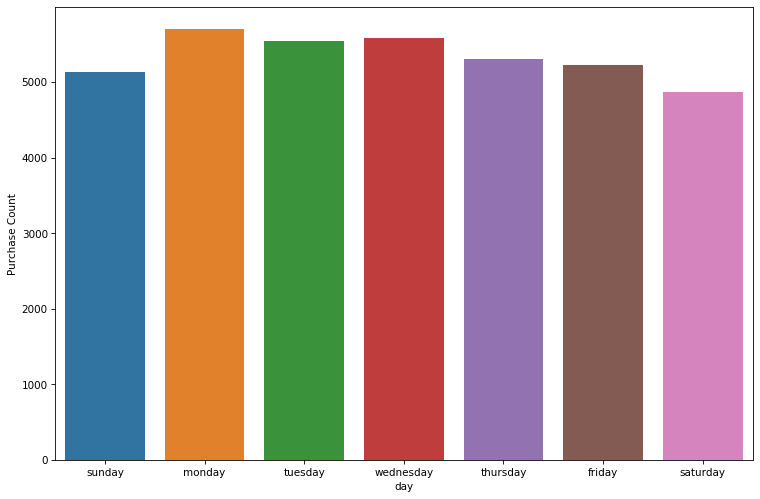

In [77]:
# membuat diagram pembelian berdasarkan hari
plt.figure(figsize=(12,8),dpi=75)
ax = sns.countplot(data=data_time[data_time['event_type']=='purchase'],x='day',order=['sunday','monday','tuesday','wednesday','thursday','friday','saturday'])
ax.set(ylabel='Purchase Count')
plt.show()

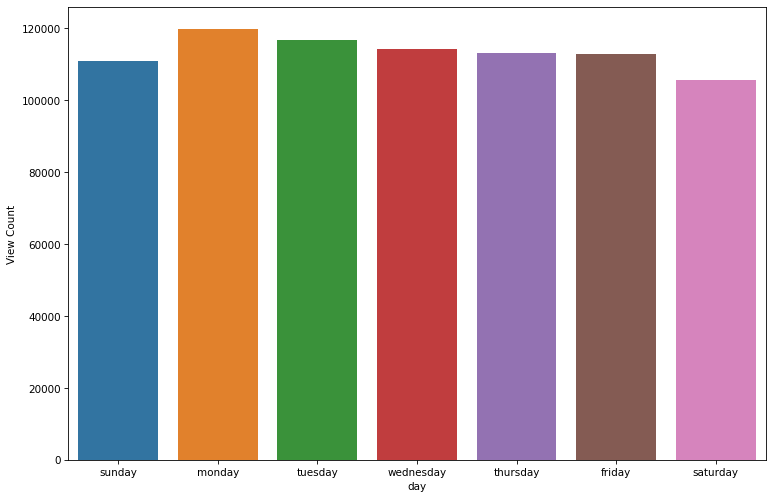

In [78]:
# membuat diagram produk dilihat berdasarkan hari
plt.figure(figsize=(12,8),dpi=75)
ax = sns.countplot(data=data_time[data_time['event_type']=='view'],x='day',order=['sunday','monday','tuesday','wednesday','thursday','friday','saturday'])
ax.set(ylabel='View Count')
plt.show()

__Observasi:__ 
1. Perbedaan pembelian produk dilihat berdasarkan harinya tidak terlalu jauh berbeda. 
2. Hari senin adalah hari yang paling banyak terjadi pembelian, nilai pembelian turun dihari-hari berikutnya hingga hari minggu yang paling sedikit terjadi pembelian.
3. Perbedaan produk dilihat berdasarkan harinya tidak terlalu jauh berbeda.
4. Hari senin adalah hari yang paling banyak produk-produk di toko online dilihat, nilai tersebut turun untuk hari-hari berikutnya sampai hari minggu yang paling sedikit produk-produk di toko online dilihat.

# Machine Learning Analysis

Algoritma machine learning yang akan dipakai untuk analisis adalah XGBoost Classifier karena menurut literatur yang penulis baca, algoritma ini adalah algoritma yang paling sering memberikan hasil terbaik dalam berbagai dataset.

## Feature Engineering

Duplicated value dibuang karena baris yang sama persis kemungkinan terjadi karena kesalahan sistem. Missing value tidak dibuang karena akan diisi sesuai dengan hasil feature engineering.

In [28]:
# import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# membaca data yang akan dimasukkan kedalam machine learning algorithm
data=pd.read_csv('events.csv')
data.head(3)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy


In [30]:
# melihat apakah ada duplicated data
data.duplicated().sum()

655

In [31]:
# menghapus duplicated data
data.drop_duplicates(inplace=True)

In [32]:
# Mengambil semua row user id yang purchase atau cart
cart_purchase_users = data.loc[data["event_type"].isin(["cart","purchase"])].drop_duplicates(subset=['user_id'])
cart_purchase_users.dropna(how='any', inplace=True)
cart_purchase_users.head(3)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
37,2020-09-24 12:02:53 UTC,cart,1507291,2144415926806642904,computers.components.power_supply,supermicro,217.57,1515915625519390468,UzabYgCPva
59,2020-09-24 12:08:24 UTC,cart,136700,2144415924491387038,computers.components.motherboard,asrock,77.73,1515915625519392459,0KdrxeTB4x
71,2020-09-24 12:12:16 UTC,cart,822426,2144415922360680550,computers.peripherals.camera,logitech,123.35,1515915625513574486,2gngxS29Ts


In [33]:
# mengambil semua data untuk user yang pernah purchase atau cart
cart_purchase_users_all_activity = data.loc[data['user_id'].isin(cart_purchase_users['user_id'])]
cart_purchase_users_all_activity.head(3)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
30,2020-09-24 12:01:33 UTC,view,888783,2144415922167742561,computers.components.hdd,NaN,83.02,1515915625519356010,3jFpdbozOd
34,2020-09-24 12:02:34 UTC,view,1507291,2144415926806642904,computers.components.power_supply,supermicro,217.57,1515915625519390468,UzabYgCPva
37,2020-09-24 12:02:53 UTC,cart,1507291,2144415926806642904,computers.components.power_supply,supermicro,217.57,1515915625519390468,UzabYgCPva


In [34]:
# membuat feature baru activity_in_session yang berisi jumlah activity tiap user_session
activity_in_session = cart_purchase_users_all_activity.groupby(['user_session'])['event_type'].count().reset_index()
activity_in_session = activity_in_session.rename(columns={"event_type": "activity_count"})
activity_in_session.head(3)

,user_session,activity_count
0,005wDfXQrv,2
1,00735945-0395-48db-967c-59418c0ddb89,2
2,009so5Mgnj,1


In [35]:
# membuat data frame feature dan feature baru is_purchased untuk melihat produk yang dibeli dan yang tidak
df_targets = data.loc[data["event_type"].isin(["cart","purchase"])].drop_duplicates(subset=['event_type', 'product_id','price', 'user_id','user_session'])
df_targets["is_purchased"] = np.where(df_targets["event_type"]=="purchase",1,0)
df_targets["is_purchased"] = df_targets.groupby(["user_session","product_id"])["is_purchased"].transform("max")
df_targets = df_targets.loc[df_targets["event_type"]=="cart"].drop_duplicates(["user_session","product_id","is_purchased"])
df_targets.head(3)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,is_purchased
37,2020-09-24 12:02:53 UTC,cart,1507291,2144415926806642904,computers.components.power_supply,supermicro,217.57,1515915625519390468,UzabYgCPva,0.0
59,2020-09-24 12:08:24 UTC,cart,136700,2144415924491387038,computers.components.motherboard,asrock,77.73,1515915625519392459,0KdrxeTB4x,0.0
71,2020-09-24 12:12:16 UTC,cart,822426,2144415922360680550,computers.peripherals.camera,logitech,123.35,1515915625513574486,2gngxS29Ts,1.0


In [36]:
# membuat feature baru even_weekday untuk melihat hari tiap user_session
df_targets['event_time']=pd.to_datetime(df_targets['event_time'])
df_targets['event_weekday'] = df_targets['event_time'].apply(lambda s: s.weekday())
df_targets.head(3)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,is_purchased,event_weekday
37,2020-09-24 12:02:53+00:00,cart,1507291,2144415926806642904,computers.components.power_supply,supermicro,217.57,1515915625519390468,UzabYgCPva,0.0,3
59,2020-09-24 12:08:24+00:00,cart,136700,2144415924491387038,computers.components.motherboard,asrock,77.73,1515915625519392459,0KdrxeTB4x,0.0,3
71,2020-09-24 12:12:16+00:00,cart,822426,2144415922360680550,computers.peripherals.camera,logitech,123.35,1515915625513574486,2gngxS29Ts,1.0,3


In [37]:
# membuat 2 feature baru mengenai 2 level kateogori produk, category_code_level1 dan category_code_level2
df_targets.dropna(how='any', inplace=True)
df_targets["category_code_level1"] = df_targets["category_code"].str.split(".",expand=True)[0].astype('category')
df_targets["category_code_level2"] = df_targets["category_code"].str.split(".",expand=True)[1].astype('category')
df_targets.head(3)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,is_purchased,event_weekday,category_code_level1,category_code_level2
37,2020-09-24 12:02:53+00:00,cart,1507291,2144415926806642904,computers.components.power_supply,supermicro,217.57,1515915625519390468,UzabYgCPva,0.0,3,computers,components
59,2020-09-24 12:08:24+00:00,cart,136700,2144415924491387038,computers.components.motherboard,asrock,77.73,1515915625519392459,0KdrxeTB4x,0.0,3,computers,components
71,2020-09-24 12:12:16+00:00,cart,822426,2144415922360680550,computers.peripherals.camera,logitech,123.35,1515915625513574486,2gngxS29Ts,1.0,3,computers,peripherals


In [38]:
# memasukkan feature jumlah aktivitas kedalam data frame
df_targets = df_targets.merge(activity_in_session, on='user_session', how='left')
df_targets['activity_count'] = df_targets['activity_count'].fillna(0)
df_targets.head(3)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,is_purchased,event_weekday,category_code_level1,category_code_level2,activity_count
0,2020-09-24 12:02:53+00:00,cart,1507291,2144415926806642904,computers.components.power_supply,supermicro,217.57,1515915625519390468,UzabYgCPva,0.0,3,computers,components,2.0
1,2020-09-24 12:08:24+00:00,cart,136700,2144415924491387038,computers.components.motherboard,asrock,77.73,1515915625519392459,0KdrxeTB4x,0.0,3,computers,components,3.0
2,2020-09-24 12:12:16+00:00,cart,822426,2144415922360680550,computers.peripherals.camera,logitech,123.35,1515915625513574486,2gngxS29Ts,1.0,3,computers,peripherals,11.0


## Data Cleansing

In [39]:
# Melihat apakah ada 'missing data'
df_targets.isna().sum()

event_time              0
event_type              0
product_id              0
category_id             0
category_code           0
brand                   0
price                   0
user_id                 0
user_session            0
is_purchased            0
event_weekday           0
category_code_level1    0
category_code_level2    0
activity_count          0
dtype: int64

In [40]:
# melihat apakah ada 'duplicated data'
df_targets.duplicated().sum()

0

**Observasi:** Tidak ada missing data dan duplicated data 

## Overcoming Imbalances

In [41]:
# melihat target variable yang nilainya 1
is_purcahase_set = df_targets[df_targets['is_purchased']== 1]
is_purcahase_set.shape[0]

14255

In [42]:
# melihat target variable yang nilainya 0
not_purcahase_set = df_targets[df_targets['is_purchased']== 0]
not_purcahase_set.shape[0]

17147

In [43]:
# persentase target variable imbalances
print('persentase variable 0: %.2f'%(int(is_purcahase_set.shape[0])/(int(not_purcahase_set.shape[0])+int(is_purcahase_set.shape[0]))))

persentase variable 0: 0.45


**Observasi:** Ada imbalances dalam data tapi tidak terlalu besar sehingga bisa dibiarkan.

## Categorical Variables Encoding

In [44]:
# memilih feature yang akan di encoding dan dimasukkan ke algoritma machine learning
features = df_targets[['brand', 'price', 'event_weekday', 'category_code_level1', 'category_code_level2', 'activity_count']]

In [45]:
# melakukan categorical data
from sklearn.preprocessing import LabelEncoder

features.loc[:,'brand'] = LabelEncoder().fit_transform(df_targets.loc[:,'brand'].copy())
features.loc[:,'event_weekday'] = LabelEncoder().fit_transform(df_targets.loc[:,'event_weekday'].copy())
features.loc[:,'category_code_level1'] = LabelEncoder().fit_transform(df_targets.loc[:,'category_code_level1'].copy())
features.loc[:,'category_code_level2'] = LabelEncoder().fit_transform(df_targets.loc[:,'category_code_level2'].copy())

is_purchased = LabelEncoder().fit_transform(df_targets['is_purchased'])

C:\Users\ILHAM ROFI'I\venvds\lib\site-packages\pandas\core\indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


# ???

## Data Splitting

In [46]:
# membagi data menjadi data training dan testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    is_purchased, 
                                                    test_size = 0.3, 
                                                    random_state = 0)

## Random Forest Modeling

In [47]:
# memodelkan data dengan algoritma Random Forest
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=10,max_features='auto',random_state=42)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [49]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [ ]:
from sklearn.model_selection import GridSearchCV

gsearch = GridSearchCV(estimator = RandomForestClassifier(random_state=42), param_grid = random_grid, scoring='f1', cv=5,
                       n_jobs=4)
gsearch.fit(X_train,y_train)
gsearch.grid_scores_, gsearch.best_params_, gsearch.best_score_

In [48]:
# menghitung matrik untuk menentukan performa algoritma machine learning
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
precision = metrics.precision_score(y_test, y_pred)
print("Precision:",precision)
recall = metrics.recall_score(y_test, y_pred)
print("Recall:",recall)
print("F1-Score:",2 * (precision * recall)/(precision + recall))

Accuracy: 0.6354951703640802
Precision: 0.6109615855150478
Recall: 0.5752130845427321
F1-Score: 0.5925486473659232


## XGBoost Data Modeling

Kolom label yang akan diprediksi adalah kolom <mark>is_purchased</mark> yang bernilai nol (tidak dibeli) atau satu (dibeli), sedangkan kolom features yang digunakan untuk memprediksi kolom label adalah: <mark>brand</mark>, <mark>price</mark>, <mark>event_weekday</mark>, <mark>category_code_level1</mark>, <mark>category_code_level2</mark> dan <mark>activity_count</mark>. Algoritma machine learning yang digunakan adalah XGBoost karena algoritma ini adalah algoritma yang paling sering memberikan hasil terbaik untuk kasus klasifikasi.

In [23]:
# memodelkan data dengan algoritma XGBoost
from xgboost import XGBClassifier
model = XGBClassifier(use_label_encoder=False,
                      learning_rate =0.01,
                      n_estimators=5000,
                      max_depth=7,
                      min_child_weight=1,
                      gamma=0,
                      subsample=0.9,
                      colsample_bytree=0.6,
                      reg_alpha=0.01,
                      objective= 'binary:logistic',
                      nthread=4,
                      scale_pos_weight=1,
                      seed=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

[13:38:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [24]:
# menghitung matrik untuk menentukan performa algoritma machine learning
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
precision = metrics.precision_score(y_test, y_pred)
print("Precision:",precision)
recall = metrics.recall_score(y_test, y_pred)
print("Recall:",recall)
print("F1-Score:",2 * (precision * recall)/(precision + recall))

Accuracy: 0.6594841311962637
Precision: 0.6303797468354431
Recall: 0.630960608154803
F1-Score: 0.6306700437485608


__Catatan:__ matrik yang dipakai adalah F1-Score.

__Observasi:__ Nilai f1-score model machine learning ini adalah 0.63, nilai ini adalah nilai yang jelek jika model machine learning benar-benar akan digunakan untuk memprediksi object variable tapi nilai ini sudah cukup bagus jika model machine learning hanya digunakan untuk menganalisis dataset.

## Feature Importance

Ada 3 metode feature importance yang digunakan yaitu built-in function xgboost, permutation methode, dan shap methode. Metode utama yang akan digunakan adalah shap methode karena menurut literasi yang penulis baca, shap methode adalah metode terbaik untuk proses feature importance. Kedua metode yang lain digunakan hanya sebagai pembanding untuk shap methode.

### Xgboost Built-In Feature Importance

In [25]:
# melihat hasil feature importance
model.feature_importances_

array([0.11302987, 0.14501148, 0.09356834, 0.09347349, 0.11192057,
       0.4429963 ], dtype=float32)

<BarContainer object of 6 artists>

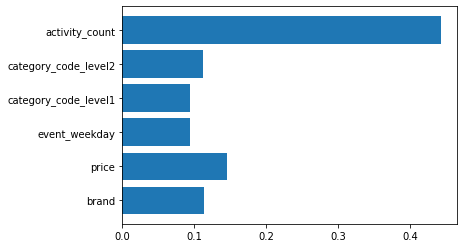

In [26]:
# membuat diagra hasil feature importance
plt.barh(features.columns, model.feature_importances_)

Text(0.5, 0, 'Xgboost Feature Importance')

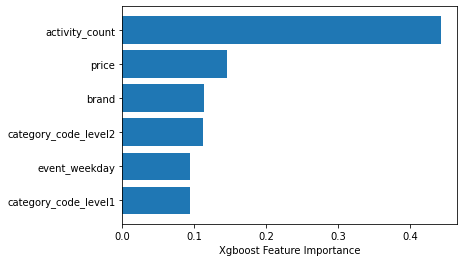

In [27]:
# mengurutkan diagram hasil feature importance
sorted_idx = model.feature_importances_.argsort()
plt.barh(features.columns[sorted_idx], model.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

### Permutation Method

In [28]:
# membuat model feature importance
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(model, X_test, y_test)

Text(0.5, 0, 'Permutation Importance')

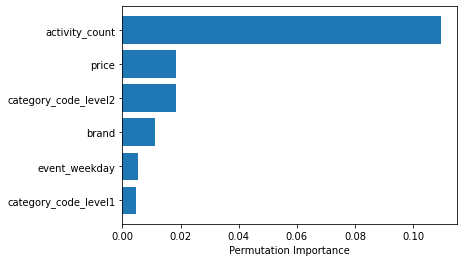

In [29]:
# membuat diagram untuk feature importance
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

### SHAP

In [30]:
# membuat model feature importance SHAP
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

C:\Users\ILHAM ROFI'I\venvds\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


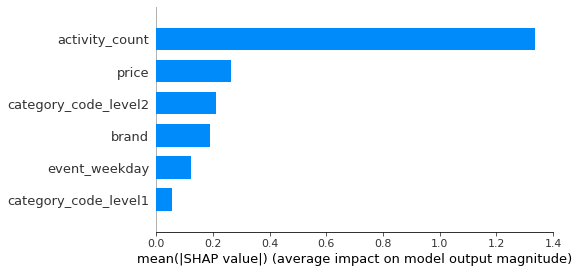

In [31]:
# membuat diagram feature importance SHAP
shap.summary_plot(shap_values, X_test, plot_type="bar")

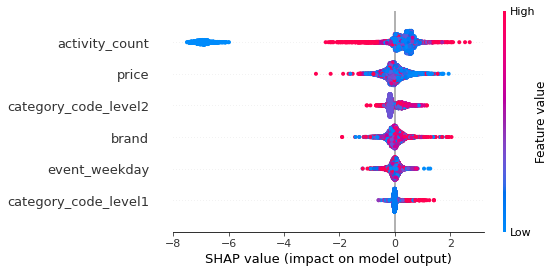

In [32]:
# membuat diagram lain yang menunjukkan efek positif atau negatif feature terhadap target variable
shap.summary_plot(shap_values, X_test)

### Kesimpulan Feature Importance

1. Hasil dari permutation methode dan shap methode adalah sama persis, sedangkan hasil dari built-in function xgboost sedikit berbeda, tapi perbedaan tersebut tidak jauh.
2. Hasil dari feature importance yang berupa tingkatan dampak tiap feature terhadap target variable dapat dilihat pada diagram di bawah.

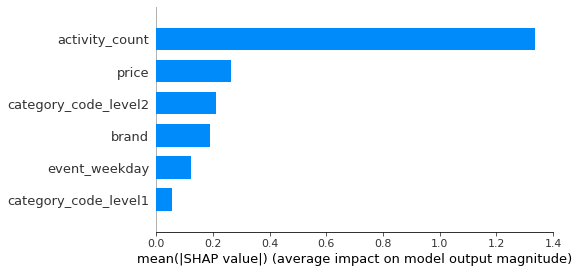

In [33]:
# diagram feature importance SHAP
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Rekomendasi

Berikut ini adalah rekomendasi penulis untuk toko online, toko offline, distributor barang, atau pihak-pihak terkait lain yang ingin menjual barang elektronik yang laris, berdasarkan data salah satu toko elektronik online yang diambil dari bulan oktober 2019 sampai bulan februari 2020. 

### 1. Menjual barang yang populer

Berdasarkan hasil proses feature importance, feature paling penting yang menentukan suatu produk laris atau tidak adalah feature <mark>activity_count</mark> yang menunjukkan seberapa populer suatu produk. Menjual produk yang populer bisa dilakukan dengan menjual barang yang memiliki brand ternama atau dengan melakukan kegiatan pengiklanan baik itu offline maupun online.

Berikut ini adalah rincian brand ternama berdasarkan kelompok produk yang ingin dijual:
1. videocard, motherboard, dll: msi, gigabyte, palit, sapphire, dan asus
2. notebook, telephone, tablet, dll: asus, sirius dan samsung
3. printer, cartrige, dll: samsung dan canon
4. cpu: amd

Jika ingin melakukan pengiklanan, hari terbaik melakukannya adalah hari senin, hari terbaik berikutnya setelah senin adalah selasa, begitu seterusnya sampai hari minggu dimana hari minggu adalah hari paling buruk untuk melakukan kegiatan pengiklanan. Hal ini berdasarkan data bahwa hari senin adalah hari paling banyak terjadi pembelian dan hari terjadi paling banyak produk-produk dilihat. Laju pembelian dan melihat produk berkurang sejalan bergantinya hari dan hari minggu adalah hari paling sedikit terjadinya pembelian dan paling sedikit produk-produk di lihat.

### 2. Menjual produk dengan murah hingga mahal

Dari hasil proses feature importance, feature paling penting kedua yang menentukan suatu produk akan laku atau tidak adalah feature <mark>price</mark> atau harga. Dari analisi dataset, hampir semua produk paling laris untuk tiap kategori dalam top 10 kategori produk paling laris, adalah produk yang harganya jauh dibawah 50% harga produk-produk terjual di kategori yang sama. Namun dari hasil analisis yang sama, salah satu peringkat kedua atau ketiga dari produk paling laris umumnya memiliki harga yang lebih mahal dari 50% produk terjual di kategori yang sama. Jadi akan lebih baik untuk menjual barang dengan harga murah di tiap kategori namun walaupun harga barang tersebut mahal, kemungkinan lakunya tetap besar. 

### 3. Menjual produk yang berada dalam 10 kategori produk paling laris

Feature paling penting ketiga yang didapat dari feature importance adalah feature <mark>category_code_level2</mark> yang menunjukkan kategori lengkap produk. Dari analisis data yang telah dilakukan, berikut ini adalah 10 kategori produk paling laris dari data tersebut:
1. videocards
2. telephone
3. cartrige
4. printer
5. notebook
6. motherboard
7. cpu
8. acoustic audio
9. tablet
10. player (auto accessories)

### 4. Menjual produk dengan brand terkenal

Feature paling penting keempat yang didapat dari feature importance adalah feature <mark>brand</mark> yang menunjukkan brand dari produk di toko online. Dari hasil analisis dataset, ditemukan bahwa untuk top 10 kategori produk, salah satu dari top 10 brand selalu masuk kedalam tiga besar produk paling laris. Pengecualian terjadi untuk kategori telephone, acoustic audio dan player (auto accessories) dimana tidak ada brand dalam top 10 brand yang menjual produk pada kategori acoustic audio dan player (auto accessories). Dari analisi juga didapat bahwa hampir seluruh top 10 kategori produk memiliki persentasi produk terjual yang No Brand jauh dibawah 50%. No Brand maksudnya adalah produk yang tidak ada nama brandnya di dataset, bisa terjadi karena brand tersebut baru atau memang produk tersebut tidak mencantumkan brandnya. Ini menunjukkan bahwa menggunakan brand yang terkenal adalah faktor yang cukup penting dalam menentukan apakah suatu produk akan laku atau tidak.

### Catatan

Ada dua feature yang tidak di bahas dalam rekomendasi ini yaitu <mark>event_weekday</mark> dan feature <mark>category_code_level1</mark>. Kedua feature tersebut tidak di bahas karena efek kedua feature tersebut kecil terhadap tigkat penjualan produk berdasarkan proses feature importance.